#Bagging From Scratch

# Import Library

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, r2_score
from mlxtend.plotting import plot_decision_regions

In [68]:
import os

# Import Datasets

In [69]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


In [70]:
for i in os.listdir(path):
  print(i)

Iris.csv
database.sqlite


In [71]:
df = pd.read_csv(path+'/Iris.csv')
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,11,5.4,3.7,1.5,0.2,Iris-setosa
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica
123,124,6.3,2.7,4.9,1.8,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica


# Preprocessiong

In [72]:
df = df.drop('Id', axis=1)

In [73]:
encoding = LabelEncoder()
df['Species'] = encoding.fit_transform(df['Species'])

In [74]:
df = df[['PetalLengthCm', 'SepalWidthCm', 'Species']]
df

,PetalLengthCm,SepalWidthCm,Species
0,1.4,3.5,0
1,1.4,3.0,0
2,1.3,3.2,0
3,1.5,3.1,0
4,1.4,3.6,0
...,...,...,...
145,5.2,3.0,2
146,5.0,2.5,2
147,5.2,3.0,2
148,5.4,3.4,2


# Extract Datasent into Smaller part

In [75]:
df_x = df.sample(100)
df_train = df_x.iloc[:50]
df_val = df_x.iloc[50: 80]
df_test = df_x.iloc[80 : ]

In [76]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# Classifier

In [77]:
def evaluate(clf,X,y):
    clf.fit(X.values,y.values)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

##  Classifier 1

In [78]:
df_train.sample(15)

,PetalLengthCm,SepalWidthCm,Species
94,4.2,2.7,1
69,3.9,2.5,1
128,5.6,2.8,2
38,1.3,3.0,0
61,4.2,3.0,1
58,4.6,2.9,1
148,5.4,3.4,2
86,4.7,3.1,1
93,3.3,2.3,1
97,4.3,2.9,1


In [79]:
bag_1 = df_train.sample(15, replace=True)
X_m1 = bag_1.iloc[:, :2]
y_m1 = bag_1.iloc[:, -1]

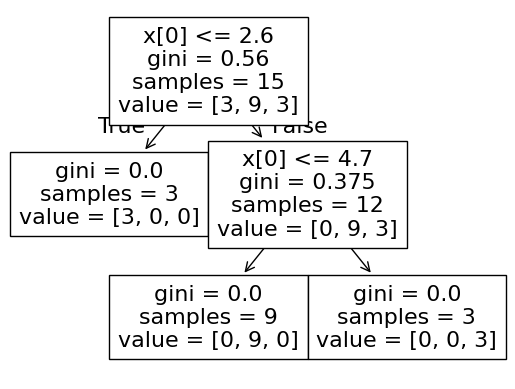

0.9666666666666667


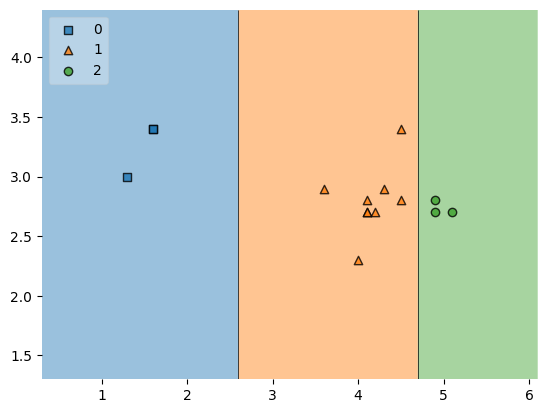

In [80]:
clf1 = DecisionTreeClassifier()
evaluate(clf1,X_m1,y_m1)

##  Classifier 2

In [81]:
bag_2 = df_train.sample(15, replace=True)
X_m2 = bag_2.iloc[:, :2]
y_m2 = bag_2.iloc[:, -1]

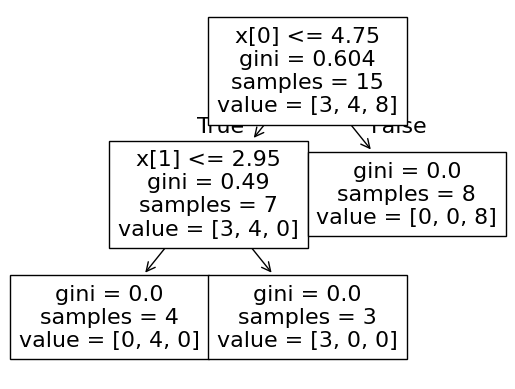

0.9


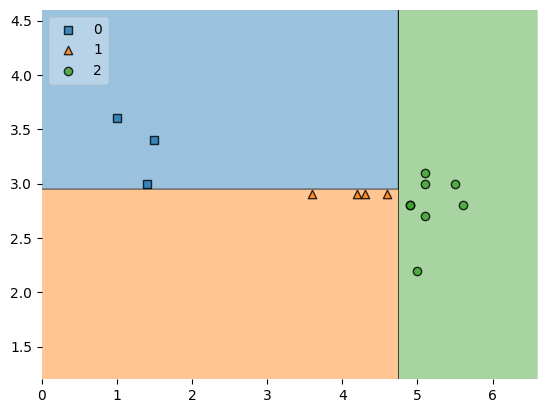

In [82]:
clf2 = DecisionTreeClassifier()
evaluate(clf2,X_m2,y_m2)

##  Classifier 3

In [83]:
bag_3 = df_train.sample(15, replace=True)
X_m3 = bag_3.iloc[:, :2]
y_m3 = bag_3.iloc[:, -1]

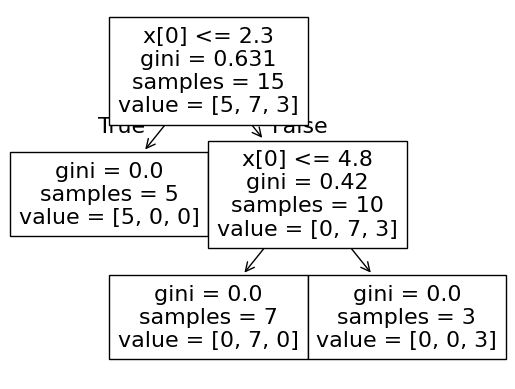

0.9666666666666667


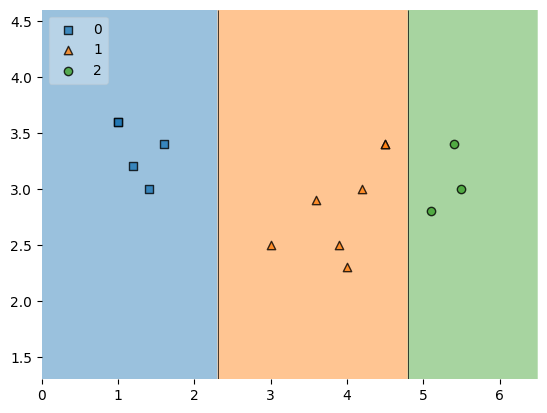

In [84]:
clf3 = DecisionTreeClassifier()
evaluate(clf3,X_m3,y_m3)

# Predict

In [85]:
df_test.sample(5)

,PetalLengthCm,SepalWidthCm,Species
66,4.5,3.0,1
8,1.4,2.9,0
84,4.5,3.0,1
109,6.1,3.6,2
49,1.4,3.3,0


In [86]:
pred_data = np.array([[4.9, 3.0]])
print("Classifier1: ", clf1.predict(pred_data))
print("Classifier2: ", clf2.predict(pred_data))
print("Classifier3: ", clf3.predict(pred_data))

Classifier1:  [2]
Classifier2:  [2]
Classifier3:  [2]


# Types of Bagging

## Pesting
```
- Row Sampling
- Without Replacement (Unique Row Every Time)
```

In [87]:
bag_x = df_train.sample(5) # No replace=True
bag_x

,PetalLengthCm,SepalWidthCm,Species
116,5.5,3.0,2
45,1.4,3.0,0
123,4.9,2.7,2
17,1.4,3.5,0
94,4.2,2.7,1


## Random Subspaces
```
- Row Sampling
- Column Sampling
- Without Replacement (Unique Row Every Time)
```

In [88]:
bag_y = df_train.sample(2, axis=1) # No replace=True
bag_y.sample(5)

,SepalWidthCm,Species
103,2.9,2
123,2.7,2
55,2.8,1
133,2.8,2
75,3.0,1


## Random Patches
```
- Row Sampling
- Column Sampling
- Replace True/False
```

In [89]:
bag_z = df_train.sample(5,replace=True).sample(2,replace=True,axis=1) # No replace=True
bag_z

,PetalLengthCm,SepalWidthCm
56,4.7,3.3
86,4.7,3.1
98,3.0,2.5
17,1.4,3.5
96,4.2,2.9


# END